In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import sys

np.set_printoptions(threshold=sys.maxsize)

img = cv2.imread("water_coins.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
ret, thres = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

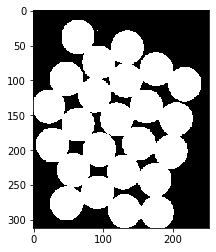

In [2]:
plt.imshow(thres, 'gray')

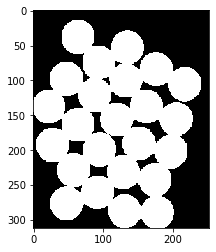

In [3]:
#removing whites in background
kernal = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thres, cv2.MORPH_OPEN, kernal, iterations=3)
# closing = cv2.morphologyEx(thres, cv2.MORPH_CLOSE, kernal)
plt.imshow(opening, 'gray')

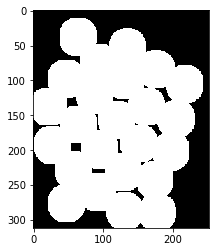

In [4]:
#dialating to make sure background gets perfect and donot mix with the items/coins actually
sure_bg = cv2.dilate(opening, kernal, iterations=3)
plt.imshow(sure_bg, 'gray')

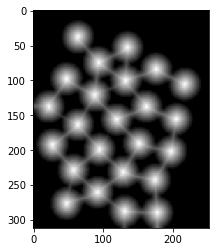

In [5]:
#dist transform is finding distance from a 0 pixel to nearest non zero pixel so closer pixels to non-zero will be darker and 
#farther will be brighter
#This helps to find center of coin

# L2 -> euclidian distance
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
plt.imshow(dist_transform, 'gray')

# 1 0 1   0 1 0
# 0 0 0   1 1 1
# 0 1 0   1 0 1

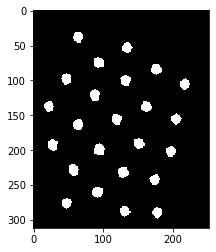

In [6]:
# 0.7times the max of dist_transform the distance from center
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
plt.imshow(sure_fg, 'gray')

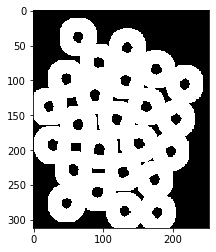

In [7]:
s_fg = np.uint8(sure_fg)
# plt.imshow(s_fg, 'gray')
unknown = cv2.subtract(sure_bg, s_fg)
plt.imshow(unknown, 'gray')
# unknown

25


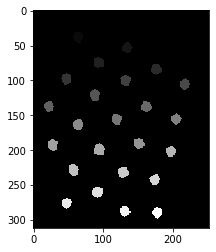

In [8]:
# Marker labelling
ret, markers = cv2.connectedComponents(s_fg)
print(ret)
plt.imshow(markers, 'gray')
# markers

In [9]:
# Add one to all labels so that sure background is not 0, but 1 to differentiate background from s_fg
markers = markers+10
# plt.imshow(markers, 'gray')
markers

array([[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 

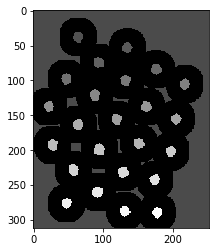

In [10]:
# 0 is put to make it a complete coin with the surrounding and differentiation with fg and bg
markers[unknown==255] = 0
plt.imshow(markers, 'gray')

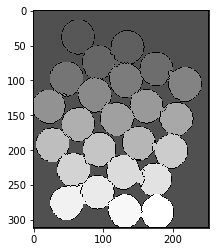

In [11]:
markers = cv2.watershed(img, markers)
plt.imshow(markers, 'gray')

In [12]:
import sys

np.set_printoptions(threshold=sys.maxsize)
markers

array([[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 

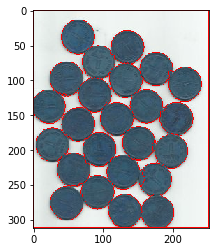

In [13]:
img[markers == -1] = [255, 0, 0]
plt.imshow(img,  'gray')

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("water_coins.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray_blur = cv2.GaussianBlur(gray, (15, 15), 0)
thresh1 = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 1)

In [ ]:
kernal = np.ones((3,3), np.uint8)
closing = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernal, iterations=4)

In [ ]:
plt.imshow(closing, 'gray')